# Density profiles

This notebook illustrates the use of the multiple density profiles available in ZPIC

Simulation parameters

In [4]:
import em1d
import numpy as np

# Custom density profile
def custom_n0(x):
    return 1.0 + 0.5*np.sin(2*x/np.pi)*np.sin(x/np.pi) 

# Time step
dt = 0.019
tmax = 10.0

# Simulation box
nx  = 64
box = 20.0

# Diagnostic frequency
ndump = 100

# Background plasma
#density = em1d.Density( type = em1d.Density.uniform )
#density = em1d.Density( type = em1d.Density.step, start = 17.5 )
#density = em1d.Density( type = em1d.Density.slab, start = 17.5, end = 22.5 )
#density = em1d.Density( type = em1d.Density.linear_ramp, start = 17.5, end = 22.5, ramp = [1.0,2.0] )
density = em1d.Density( type = em1d.Density.custom, custom = custom_n0 )

electrons = em1d.Species( "electrons", -1.0, 128, density = density )

# Initialize simulation data
sim = em1d.Simulation( nx, box, dt, tmax, electrons )

# Set moving window
sim.set_moving_window()

# Diagnostics
def report( sim ):
    if ( sim.n % ndump == 0 ):

        # Charge density
        electrons.report( em1d.Species.charge )
        
        # raw particle data
        electrons.report( em1d.Species.particles )

Run simulation

In [5]:
sim.run(report)

Starting simulation...
n = 526, t = 9.994
Simulation completed.


## Charge Density

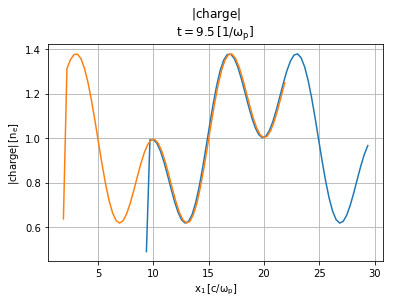

In [7]:
import zdf
import matplotlib.pyplot as plt

(data,info) = zdf.read_grid("electrons/charge-000500.zdf")

data = np.abs(data)
info['grid']['label'] = '|'+info['grid']['label']+'|'

plt.plot(np.linspace(info['grid']['axis'][0]['min'], 
                     info['grid']['axis'][0]['max'], 
                     num = info['grid']['nx'][0] ),
         data )

xlabel = "{:s}\,[{:s}]".format(info['grid']['axis'][0]['label'],info['grid']['axis'][0]['units'])
ylabel = "{:s}\,[{:s}]".format(info['grid']['label'], info['grid']['units'])

title = info['grid']['label']
timeLabel = "t = {:g}\,[{:s}]".format(info['iteration']['t'],info['iteration']['tunits'])

plt.title(r'$\sf{' + title + r'}$' + '\n' + r'$\sf{'+ timeLabel+ r'}$')
plt.xlabel(r'$\sf{' +xlabel+ r'}$')
plt.ylabel(r'$\sf{' +ylabel+ r'}$')

plt.grid(True)
plt.show()